In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

## Purpose:
Identify numbers (MNIST data) using SVCs and kernels. 

## Data Set-up 

Import data and use train_test_split to set up training and testing datasets. 


In [2]:
#import train_test_split 
from sklearn.model_selection import train_test_split

mnist = fetch_mldata('MNIST original')

X = mnist.data.astype('float64')
y = mnist.target.astype('int64')

# print shapes of X and y
print(X.shape)
print(y.shape)

# set test size to 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Use only 10000 samples

X_train = X_train[:5000]
y_train = y_train[:5000]
X_test = X_test[:1000]
y_test = y_test[:1000]

(70000, 784)
(70000,)


In [3]:
# Make new test and train sets with only 1's and 7's

train_mask = ((y_train == 1).astype(int) + (y_train == 7).astype(int)).astype(bool)
test_mask = ((y_test == 1).astype(int) + (y_test == 7).astype(int)).astype(bool)

X_test = X_test[test_mask, :]
y_test = y_test[test_mask]
X_train = X_train[train_mask, :]
y_train = y_train[train_mask]

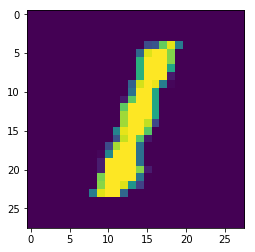

In [4]:
# Use this to visualize the dataset
# Feel free to change the index
#                  v
plt.imshow(X_train[4].reshape(28,28))
plt.show()

## Use PCA from sklearn
We will use Principal Component Analysis (PCA) to manipulate the data to make it more usable for SVC. The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set by projecting the data on to a space while still retaining as much variance in the data as possible.

In [5]:
from sklearn.decomposition import PCA

# Keep 80% of feature variation. Get rid of the rest.
pca = PCA(n_components=2)

# Use pca to get new X_train, X_test
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#print the shape of X_train_pca 
print(X_train_pca.shape)

(1070, 2)


What change do you notice between our old training data and our new one?

Answer: We reduced the number of features or input data but still retained 80% of the information.

## SVC and Kernels

Now we will experiment with support vector classifiers and kernels. We will need `LinearSVC`, `SVC`, and `accuracy_score`.

SVMs are really interesting because they have something called the dual formulation, in which the computation is expressed as training point inner products. This means that data can be lifted into higher dimensions easily with this "kernel trick". Data that is not linearly separable in a lower dimension can be linearly separable in a higher dimension - which is why we conduct the transform. Let us experiment.

A transformation that lifts the data into a higher-dimensional space is called a kernel. A poly- nomial kernel expands the feature space by computing all the polynomial cross terms to a specific degree.

In [65]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

# fit the LinearSVC on X_train_pca and y_train and then print train accuracy and test accuracy

lsvc = LinearSVC(dual=False, tol=0.01) 
lsvc.fit(X_train_pca, y_train)
print('train acc: ', accuracy_score(lsvc.predict(X_train_pca), y_train))
print('test acc: ', accuracy_score(lsvc.predict(X_test_pca), y_test))
        
# use SVC with a polynomial kernel. Fit this model on X_train_pca and y_train and print accuracy metrics as before

rsvc = SVC()
rsvc.fit(X_train_pca, y_train)
print('train acc: ', accuracy_score(rsvc.predict(X_train_pca), y_train)) 
print('test acc: ', accuracy_score(rsvc.predict(X_test_pca), y_test))



train acc:  0.9700934579439252
test acc:  0.9603960396039604
train acc:  1.0
test acc:  0.5099009900990099


## 1's and 7's

Now let's train a classifier only on 1's and 7's

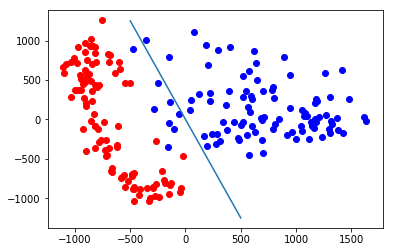

In [26]:
ones = X_test_pca[y_test==1]
sevens = X_test_pca[y_test==7]

plt.scatter(ones[:,0], ones[:,1], c='r')
plt.scatter(sevens[:,0], sevens[:,1], c='b')

# Code to plot the decision boundary of a linear svm

weights = lsvc.coef_[0]
x = np.linspace(-500,500,100)
y = x / weights[1] * -weights[0]
plt.plot(x,y)

plt.show()

In [38]:
scores = lsvc.decision_function(X_test_pca)
sorted_X = X_test[scores.argsort()]

(202, 784)


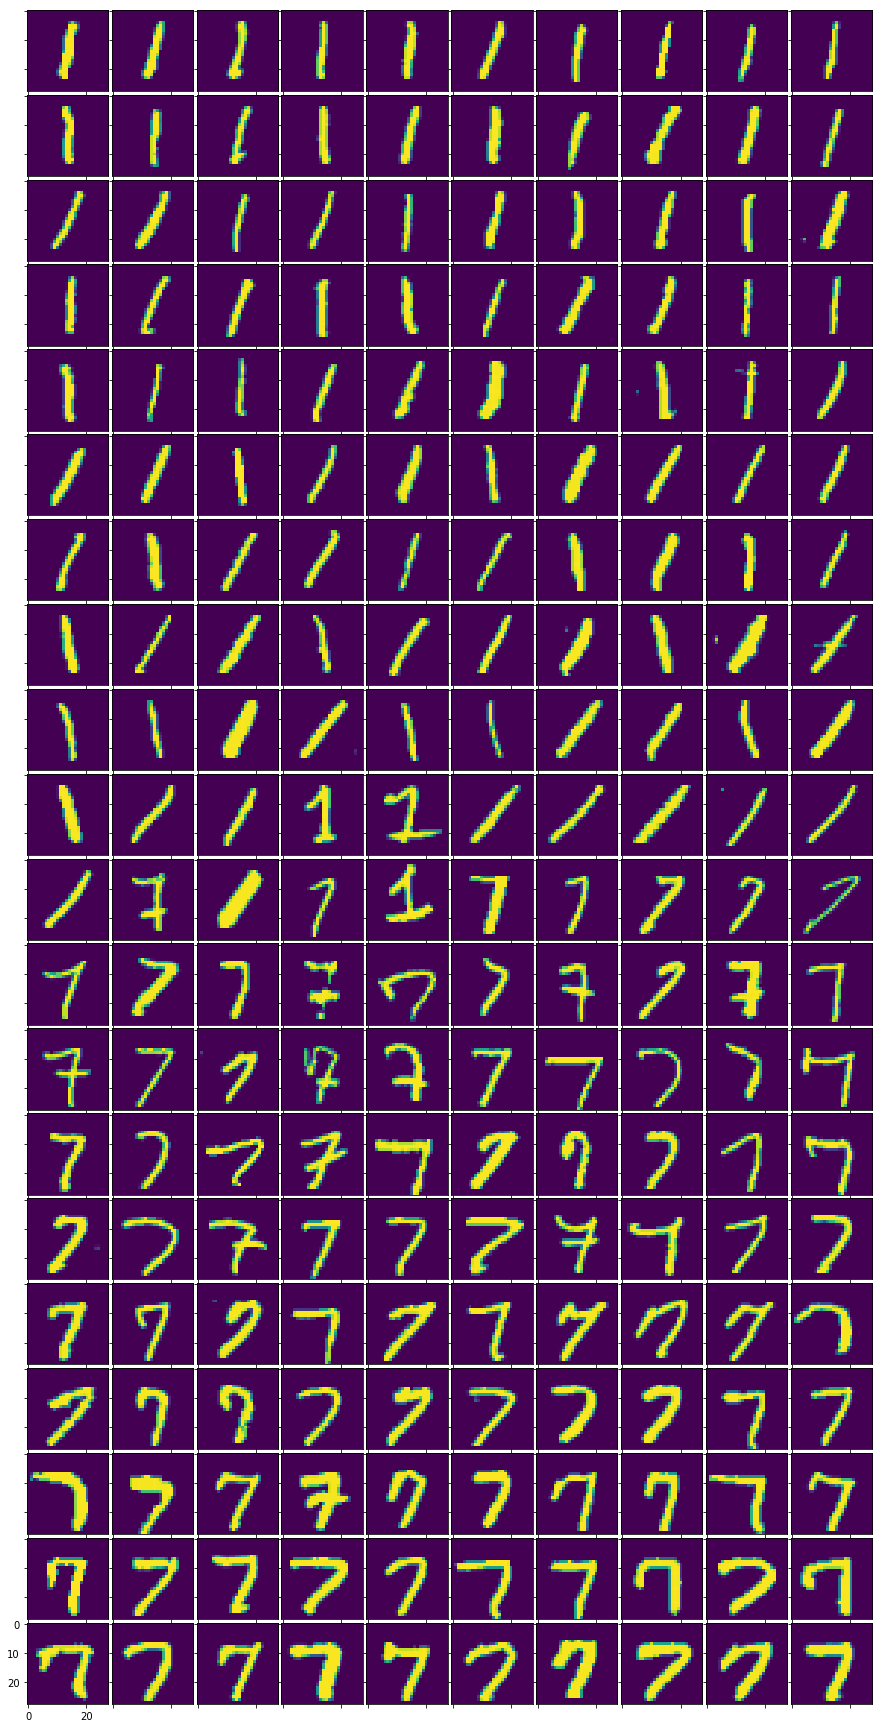

In [57]:
from mpl_toolkits.axes_grid1 import AxesGrid

def plot(x):
    plt.imshow(x.reshape(28,28))
    plt.show()

def plot_dataset(X):
    fig = plt.figure(1, (60, 60))

    fig.subplots_adjust(left=0.05, right=0.95)
    
    grid = AxesGrid(fig, 141,  # similar to subplot(141)
                    nrows_ncols=(20, 10),
                    axes_pad=0.05,
                    label_mode="1",
                    )
    
    for i in range(200):
        grid[i].imshow(X[i].reshape(28,28))
        
plot_dataset(sorted_X)

## Conclusions

1) What is a kernel and why is it important?

2) Can we kernelize all types of data? Why or why not?

3) What are some pros/cons of kernels? (look into runtime)
